In [1]:
from datetime import timedelta, date
import datetime
import numpy as np
import pandas as pd
import string
import re
import csv
import requests
import string

df_remotes = pd.read_csv('turnstile_location.csv', delimiter = ',', header = 0, skipinitialspace = True)

df_remotes.drop('1', axis = 1, inplace = True)

In [2]:
df_remotes.head()
#check data

Remote  Booth       Station Line Name Division
0   R001   A060  WHITEHALL ST        R1      BMT
1   R001   A058  WHITEHALL ST        R1      BMT
2   R001  R101S   SOUTH FERRY        R1      IRT
3   R002   A077     FULTON ST  ACJZ2345      BMT
4   R002   A081     FULTON ST  ACJZ2345      BMT

In [3]:
df_traffic = pd.read_csv('traffic.csv', delimiter = ',', header = 0, skipinitialspace = True) #read in data

In [4]:
df_traffic.head(5) #check

C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
0  A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
1  A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
2  A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
3  A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
4  A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   

       TIME     DESC  ENTRIES    EXITS  
0  00:00:00  REGULAR  5095940  1725998  
1  04:00:00  REGULAR  5095981  1726007  
2  08:00:00  REGULAR  5096001  1726039  
3  12:00:00  REGULAR  5096137  1726130  
4  16:00:00  REGULAR  5096419  1726208

In [5]:
df_traffic.head() #check

C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
0  A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
1  A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
2  A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
3  A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
4  A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   

       TIME     DESC  ENTRIES    EXITS  
0  00:00:00  REGULAR  5095940  1725998  
1  04:00:00  REGULAR  5095981  1726007  
2  08:00:00  REGULAR  5096001  1726039  
3  12:00:00  REGULAR  5096137  1726130  
4  16:00:00  REGULAR  5096419  1726208

In [6]:
#following 6 lines used to filter data and make sure names are 
#correct for all of the stations using names in 'REMOTE_ID File 
df_traffic["REMOTE_ID"] = df_traffic["C/A"] + df_traffic["UNIT"] 

In [7]:
df_remotes["REMOTE_ID"] = df_remotes["Booth"] + df_remotes["Remote"]

In [8]:
df_remotes.rename(columns={'Station': 'STATION_NAME'}, inplace=True)

In [9]:
df_remotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
Remote          768 non-null object
Booth           768 non-null object
STATION_NAME    768 non-null object
Line Name       768 non-null object
Division        768 non-null object
REMOTE_ID       768 non-null object
dtypes: object(6)
memory usage: 36.1+ KB


In [1]:
df_remotes[["STATION_NAME","REMOTE_ID"]].set_index("REMOTE_ID")

In [11]:
df_traffic=df_traffic.set_index('REMOTE_ID').join(df_remotes[["STATION_NAME","REMOTE_ID"]].set_index('REMOTE_ID'))
df_traffic

C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
REMOTE_ID                                                                       
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/19/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/19/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/19/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/19/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/19/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/19/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/20/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/20/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/20/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/20/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/20/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/20/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/21/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/21/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/21/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/21/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/21/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/21/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/22/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/22/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/22/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/22/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/22/2015   
A002R051    A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/22/2015   
...          ...   ...       ...            ...      ...      ...         ...   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  05/16/2016   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  05/16/2016   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  05/16/2016   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  05/17/2016   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  05/17/2016   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  05/17/2016   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  05/17/2016   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  05/17/2016   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  05/17/2016   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  05/18/2016   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  05/18/2016   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  05/18/2016   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  05/18/2016   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  05/18/2016   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  05/18/2016   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  05/19/2016   
TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEV

In [12]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1738640 entries, A002R051 to TRAM2R469
Data columns (total 12 columns):
C/A             object
UNIT            object
SCP             object
STATION         object
LINENAME        object
DIVISION        object
DATE            object
TIME            object
DESC            object
ENTRIES         int64
EXITS           int64
STATION_NAME    object
dtypes: int64(2), object(10)
memory usage: 172.4+ MB


In [13]:
#df_traffic = pd.read_csv('traffic.csv', delimiter = ',', header = 0, skipinitialspace = True)

In [14]:
df_traffic.head(5) #check

C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
REMOTE_ID                                                                      
A002R051   A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
A002R051   A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
A002R051   A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
A002R051   A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   
A002R051   A002  R051  02-00-00  LEXINGTON AVE   NQR456      BMT  04/18/2015   

               TIME     DESC  ENTRIES    EXITS   STATION_NAME  
REMOTE_ID                                                      
A002R051   00:00:00  REGULAR  5095940  1725998  LEXINGTON AVE  
A002R051   04:00:00  REGULAR  5095981  1726007  LEXINGTON AVE  
A002R051   08:00:00  REGULAR  5096001  1726039  LEXINGTON AVE  
A002R051   12:00:00  REGULAR  5096137  1726130  LEXINGTON AVE  
A002R051   16:00:00  REGULAR  5096419  1726208  LEXINGTON AVE

In [15]:
df_traffic.isnull().sum() #check

C/A                 0
UNIT                0
SCP                 0
STATION             0
LINENAME            0
DIVISION            0
DATE                0
TIME                0
DESC                0
ENTRIES             0
EXITS               0
STATION_NAME    45569
dtype: int64

In [16]:
df_traffic.describe() #check to see percentiles

ENTRIES         EXITS
count  1.738640e+06  1.738640e+06
mean   3.230188e+07  2.592695e+07
std    1.869530e+08  1.668627e+08
min    0.000000e+00  0.000000e+00
25%    5.263878e+05  2.766300e+05
50%    2.428466e+06  1.444679e+06
75%    6.216643e+06  4.448201e+06
max    2.146661e+09  2.087387e+09

In [17]:
df_traffic.columns #check to see if newly created STATION_NAME is intact

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'STATION_NAME'],
      dtype='object')

In [18]:
df_traffic_time = df_traffic.TIME.value_counts().sort_values(ascending = False) #Sorting values by time and count

print(df_traffic_time.head(50))

04:00:00    149794
00:00:00    149778
08:00:00    149713
12:00:00    149623
16:00:00    149623
20:00:00    149623
01:00:00    105844
05:00:00    105828
09:00:00    105804
21:00:00    105776
17:00:00    105733
13:00:00    105705
10:00:00      6933
02:00:00      6924
14:00:00      6924
06:00:00      6919
18:00:00      6917
22:00:00      6915
23:00:00      2461
11:00:00      2459
03:00:00      2458
19:00:00      2457
15:00:00      2456
07:00:00      2456
00:22:00      2333
04:22:00      2331
20:22:00      2331
08:22:00      2331
16:22:00      2330
12:22:00      2329
22:30:00      1261
18:30:00      1260
02:30:00      1260
06:30:00      1260
10:30:00      1259
14:30:00      1257
04:30:00       629
00:30:00       629
20:30:00       629
08:30:00       629
12:30:00       627
16:30:00       625
05:00:01        56
08:46:31        33
07:41:25        32
10:07:04        30
07:51:16        30
10:11:32        29
08:46:10        28
10:12:23        28
Name: TIME, dtype: int64


In [19]:
df_traffic_time.describe() #check

count     51424.000000
mean         33.809894
std        1981.456319
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max      149794.000000
Name: TIME, dtype: float64

In [20]:
df_traffic["DATE_TIME"] = pd.to_datetime(df_traffic.DATE + " " + df_traffic.TIME, format="%m/%d/%Y %H:%M:%S") 
#combined date and time field to datetime

In [21]:
df_traffic = df_traffic.sort_values(by=['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE_TIME'], ascending=True)
#sort values

In [22]:
df_traffic.head() #check

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE  \
REMOTE_ID                                                               
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   

               TIME     DESC  ENTRIES    EXITS   STATION_NAME  \
REMOTE_ID                                                       
A002R051   00:00:00  REGULAR  5620446  1903294  LEXINGTON AVE   
A002R051   04:00:00  REGULAR  5620502  1903306  LEXINGTON AVE   
A002R051   07:52:20  REGULAR  5620518  1903334  LEXINGTON AVE   
A002R051   08:00:00  REGULAR  5620519  1903339  LEXINGTON AVE   
A002R051   08:01:14  REGULAR  5620519  1903339  LEXINGTON AVE   

                    DATE_TIME  
REMOTE_ID                      
A002R051  2016-04-16 00:00:00  
A002R051  2016-04-16 04:00:00  
A002R051  2016-04-16 07:52:20  
A002R051  2016-04-16 08:00:00  
A002R051  2016-04-16 08:01:14

In [23]:
df_traffic[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df_traffic
                                                       .groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION'])['DATE_TIME', 'ENTRIES', 'EXITS']
                                                       .transform(lambda grp: grp.shift(1)))
#groupby datetime entries, exits

In [24]:
df_traffic.head()

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE  \
REMOTE_ID                                                               
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   

               TIME     DESC  ENTRIES    EXITS   STATION_NAME  \
REMOTE_ID                                                       
A002R051   00:00:00  REGULAR  5620446  1903294  LEXINGTON AVE   
A002R051   04:00:00  REGULAR  5620502  1903306  LEXINGTON AVE   
A002R051   07:52:20  REGULAR  5620518  1903334  LEXINGTON AVE   
A002R051   08:00:00  REGULAR  5620519  1903339  LEXINGTON AVE   
A002R051   08:01:14  REGULAR  5620519  1903339  LEXINGTON AVE   

                    DATE_TIME           PREV_DATE  PREV_ENTRIES  PREV_EXITS  
REMOTE_ID                                                                    
A002R051  2016-04-16 00:00:00                 NaT           NaN         NaN  
A002R051  2016-04-16 04:00:00 2016-04-16 00:00:00     5620446.0   1903294.0  
A002R051  2016-04-16 07:52:20 2016-04-16 04:00:00     5620502.0   1903306.0  
A002R051  2016-04-16 08:00:00 2016-04-16 07:52:20     5620518.0   1903334.0  
A002R051  2016-04-16 08:01:14 2016-04-16 08:00:00     5620519.0   1903339.0

In [25]:
df_traffic["DIFF_ENTRIES"] = abs(df_traffic["ENTRIES"] - df_traffic["PREV_ENTRIES"]) 
#take absolute values of entry for days n & n-1 to find difference in movement by day, same for exits for line below

In [26]:
df_traffic["DIFF_EXITS"] = abs(df_traffic["EXITS"] - df_traffic["PREV_EXITS"])

In [27]:
df_traffic["TOT_TRAFFIC"] = (df_traffic["DIFF_ENTRIES"] + df_traffic["DIFF_EXITS"]) #combine to find total traffic per day

In [28]:
df_traffic.head()

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE  \
REMOTE_ID                                                               
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   

               TIME     DESC  ENTRIES    EXITS   STATION_NAME  \
REMOTE_ID                                                       
A002R051   00:00:00  REGULAR  5620446  1903294  LEXINGTON AVE   
A002R051   04:00:00  REGULAR  5620502  1903306  LEXINGTON AVE   
A002R051   07:52:20  REGULAR  5620518  1903334  LEXINGTON AVE   
A002R051   08:00:00  REGULAR  5620519  1903339  LEXINGTON AVE   
A002R051   08:01:14  REGULAR  5620519  1903339  LEXINGTON AVE   

                    DATE_TIME           PREV_DATE  PREV_ENTRIES  PREV_EXITS  \
REMOTE_ID                                                                     
A002R051  2016-04-16 00:00:00                 NaT           NaN         NaN   
A002R051  2016-04-16 04:00:00 2016-04-16 00:00:00     5620446.0   1903294.0   
A002R051  2016-04-16 07:52:20 2016-04-16 04:00:00     5620502.0   1903306.0   
A002R051  2016-04-16 08:00:00 2016-04-16 07:52:20     5620518.0   1903334.0   
A002R051  2016-04-16 08:01:14 2016-04-16 08:00:00     5620519.0   1903339.0   

           DIFF_ENTRIES  DIFF_EXITS  TOT_TRAFFIC  
REMOTE_ID                                         
A002R051            NaN         NaN          NaN  
A002R051           56.0        12.0         68.0  
A002R051           16.0        28.0         44.0  
A002R051            1.0         5.0          6.0  
A002R051            0.0         0.0          0.0

In [29]:
df_traffic.sort_values(['DIFF_ENTRIES'],ascending = False).head(5) #sort by difference days

C/A  UNIT       SCP          STATION LINENAME DIVISION  \
REMOTE_ID                                                             
N067R012    N067  R012  00-03-00   34 ST-PENN STA      ACE      IND   
N016AR296  N016A  R296  00-00-01  163 ST-AMSTERDM        C      IND   
R310R053    R310  R053  01-00-02     149 ST-3 AVE       25      IRT   
R305R206    R305  R206  01-00-02           125 ST       23      IRT   
N501R020    N501  R020  01-03-02   47-50 STS ROCK     BDFM      IND   

                 DATE      TIME        DESC     ENTRIES       EXITS  \
REMOTE_ID                                                             
N067R012   05/03/2016  16:00:00  RECOVR AUD     2425094         164   
N016AR296  04/16/2016  01:00:00     REGULAR  1952546825   664258783   
R310R053   05/06/2015  08:00:00     REGULAR  1946156083  1241538350   
R305R206   04/16/2016  01:00:00     REGULAR  1946124769  1493224142   
N501R020   05/04/2016  16:00:00     REGULAR  1921834861  2035494500   

              STATION_NAME           DATE_TIME           PREV_DATE  \
REMOTE_ID                                                            
N067R012    34 ST-PENN STA 2016-05-03 16:00:00 2016-05-03 12:00:00   
N016AR296  163 ST-AMSTERDM 2016-04-16 01:00:00 2015-05-10 13:00:00   
R310R053      149 ST-3 AVE 2015-05-06 08:00:00 2015-05-06 04:00:00   
R305R206            125 ST 2016-04-16 01:00:00 2015-05-15 21:00:00   
N501R020     47-50 ST-ROCK 2016-05-04 16:00:00 2016-05-04 12:00:00   

           PREV_ENTRIES   PREV_EXITS  DIFF_ENTRIES    DIFF_EXITS   TOT_TRAFFIC  
REMOTE_ID                                                                       
N067R012   1.964215e+09  486935942.0  1.961790e+09  4.869358e+08  2.448726e+09  
N016AR296  2.003000e+04       1695.0  1.952527e+09  6.642571e+08  2.616784e+09  
R310R053   4.795961e+06     569023.0  1.941360e+09  1.240969e+09  3.182329e+09  
R305R206   8.601293e+06    5578062.0  1.937523e+09  1.487646e+09  3.425170e+09  
N501R020   1.506382e+07   12534890.0  1.906771e+09  2.022960e+09  3.929731e+09

In [30]:
df_traffic[(df_traffic.LINENAME == 'F') & (df_traffic.UNIT == 'R302') & (df_traffic.SCP == '00-06-00') & (df_traffic.DATE == '04/12/2017')]

Empty DataFrame
Columns: [C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS, STATION_NAME, DATE_TIME, PREV_DATE, PREV_ENTRIES, PREV_EXITS, DIFF_ENTRIES, DIFF_EXITS, TOT_TRAFFIC]
Index: []

In [31]:
df_traffic.DESC.value_counts()

REGULAR       1730493
RECOVR AUD       8147
Name: DESC, dtype: int64

In [32]:
df_traffic.DATE.describe()

count        1738640
unique            63
top       04/18/2016
freq           28710
Name: DATE, dtype: object

In [33]:
from copy import deepcopy, copy

df_traffic_nan = df_traffic.copy(deep=True)
#create deep copy

In [34]:
df_traffic_nan.dropna(axis=0, how='any', inplace = True)
#drop nan values

In [70]:
df_traffic_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1686591 entries, A002R051 to TRAM2R469
Data columns (total 19 columns):
C/A             1686591 non-null object
UNIT            1686591 non-null object
SCP             1686591 non-null object
STATION         1686591 non-null object
LINENAME        1686591 non-null object
DIVISION        1686591 non-null object
DATE            1686591 non-null object
TIME            1686591 non-null object
DESC            1686591 non-null object
ENTRIES         1686591 non-null int64
EXITS           1686591 non-null int64
STATION_NAME    1686591 non-null object
DATE_TIME       1686591 non-null datetime64[ns]
PREV_DATE       1686591 non-null datetime64[ns]
PREV_ENTRIES    1686591 non-null float64
PREV_EXITS      1686591 non-null float64
DIFF_ENTRIES    1686591 non-null float64
DIFF_EXITS      1686591 non-null float64
TOT_TRAFFIC     1686591 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(2), object(10)
memory usage: 297.4+ MB


In [36]:
df_traffic_nan[df_traffic_nan.PREV_ENTRIES.isnull()]
#check for nulls

Empty DataFrame
Columns: [C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS, STATION_NAME, DATE_TIME, PREV_DATE, PREV_ENTRIES, PREV_EXITS, DIFF_ENTRIES, DIFF_EXITS, TOT_TRAFFIC]
Index: []

In [37]:
df_traffic_nan.TOT_TRAFFIC.plot.hist()
#plot hist

In [38]:
#df_traffic_201705.groupby('TOT_TRAFFIC')['DATE'].transform(lambda x: max(x))
df_traffic_time = df_traffic_nan[df_traffic_nan.DATE == df_traffic_nan.groupby('TOT_TRAFFIC').DATE.transform(max)]
df_sort_time=df_traffic_time[['DATE','TOT_TRAFFIC']].sort_values(by=['TOT_TRAFFIC'], ascending =False)
station_data = df_sort_time.groupby(['DATE']).TOT_TRAFFIC.agg(['max'])
station_data
#data by date

max
DATE                    
04/16/2016  3.425170e+09
04/17/2016  1.056260e+05
04/18/2015  4.758520e+05
04/18/2016  1.872160e+05
04/19/2016  9.352260e+05
04/20/2015  1.678285e+08
04/20/2016  9.833680e+05
04/21/2015  1.651192e+06
04/21/2016  9.830070e+05
04/22/2015  2.206016e+09
04/22/2016  1.513029e+06
04/23/2015  1.169818e+08
04/23/2016  5.297617e+06
04/24/2015  4.121000e+03
04/24/2016  5.297478e+06
04/25/2015  2.839900e+04
04/25/2016  8.388524e+07
04/26/2015  3.005000e+03
04/26/2016  2.351001e+06
04/27/2015  2.841007e+09
04/27/2016  1.955235e+09
04/28/2015  4.512608e+08
04/28/2016  1.476369e+09
04/29/2015  6.665548e+06
04/29/2016  3.420569e+06
04/30/2015  5.857840e+05
04/30/2016  8.388587e+07
05/01/2015  1.387045e+09
05/01/2016  1.510501e+08
05/02/2015  2.916000e+03
...                  ...
05/03/2015  1.826600e+04
05/03/2016  2.448726e+09
05/04/2015  1.615171e+09
05/04/2016  3.929731e+09
05/05/2015  2.063400e+04
05/05/2016  8.368952e+07
05/06/2015  3.182329e+09
05/06/2016  1.510142e+08
05/07/2015  5.411189e+07
05/07/2016  8.450140e+07
05/08/2015  1.174396e+08
05/08/2016  1.458025e+06
05/09/2015  1.636930e+05
05/09/2016  1.443035e+09
05/10/2016  4.512143e+08
05/11/2015  7.019232e+08
05/11/2016  3.300959e+09
05/12/2015  1.760419e+09
05/12/2016  2.179222e+06
05/13/2015  6.506510e+05
05/13/2016  9.820029e+06
05/14/2015  9.692922e+08
05/14/2016  1.174404e+08
05/15/2015  1.229750e+05
05/15/2016  1.336901e+09
05/16/2016  8.388552e+07
05/17/2016  3.026074e+08
05/18/2016  2.214903e+06
05/19/2016  1.174363e+08
05/20/2016  3.472695e+09

[61 rows x 1 columns]

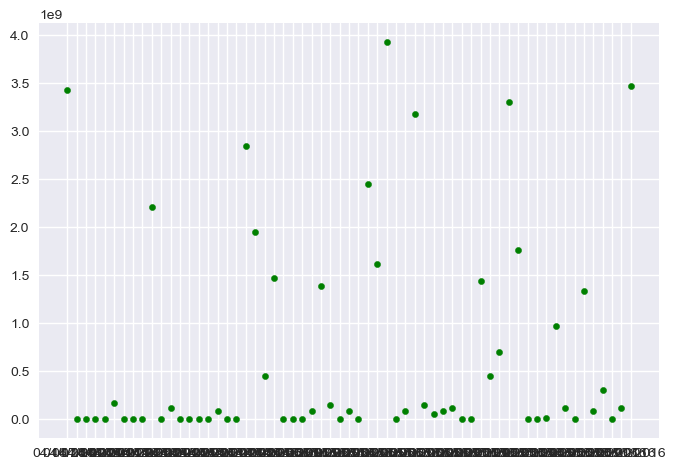

In [69]:
x = station_data.index
y = station_data['max']
plt.figure(dpi=100)
plt.scatter(x,y, s= 20, marker = 'o', c='green') # Small size circles
#This will be used for future study, fixing this up when we have more of a clue what's going on, if we ever do..

In [40]:
df_traffic_nan2 = df_traffic_nan.groupby(['STATION_NAME','DATE']).TOT_TRAFFIC.agg(['max'])
df_traffic_nan2.sort_values('max',ascending = False)
#sort by station name and find max values of total traffic

max
STATION_NAME    DATE                    
47-50 ST-ROCK   05/04/2016  3.929731e+09
CANAL ST        05/20/2016  3.472695e+09
125 ST          04/16/2016  3.425170e+09
28 ST           05/11/2016  3.300959e+09
149 ST-3 AVE    05/06/2015  3.182329e+09
116 ST          04/16/2016  2.887042e+09
FULTON ST       04/27/2015  2.841007e+09
34 ST-PENN STA  04/16/2016  2.694594e+09
167 ST          04/16/2016  2.624483e+09
163 ST-AMSTERDM 04/16/2016  2.616784e+09
72 ST           04/16/2016  2.583594e+09
34 ST-PENN STA  05/03/2016  2.448726e+09
MYRTLE AVE      04/22/2015  2.206016e+09
34 ST-HERALD SQ 04/16/2016  2.040265e+09
7 AV-PARK SLOPE 04/27/2016  1.955235e+09
59 ST           05/12/2015  1.760419e+09
GRAND ST        05/04/2015  1.615171e+09
42 ST-GRD CNTRL 04/28/2016  1.476369e+09
CANAL ST        04/16/2016  1.475418e+09
BOWLING GREEN   05/09/2016  1.443035e+09
45 ST           04/16/2016  1.440303e+09
116 ST-COLUMBIA 05/01/2015  1.387045e+09
BEVERLY ROAD    05/15/2016  1.336901e+09
FREEMAN ST      04/16/2016  1.270706e+09
77 ST           04/16/2016  1.244301e+09
JAMAICA CENTER  04/16/2016  1.211606e+09
110 ST-CPN      05/14/2015  9.692922e+08
18 ST           05/12/2015  9.358048e+08
14 ST-6 AVE     05/11/2015  7.019232e+08
174 ST          04/16/2016  6.892738e+08
...                                  ...
ORCHARD BEACH   05/09/2016  0.000000e+00
                05/15/2016  0.000000e+00
MIDDLETOWN ROAD 04/24/2016  0.000000e+00
ORCHARD BEACH   05/11/2016  0.000000e+00
                05/13/2016  0.000000e+00
AVE P           05/15/2016  0.000000e+00
BUHRE AVE       04/19/2015  0.000000e+00
ORCHARD BEACH   05/20/2016  0.000000e+00
                05/03/2016  0.000000e+00
EAST 105 ST     04/17/2016  0.000000e+00
ORCHARD BEACH   04/30/2016  0.000000e+00
MIDDLETOWN ROAD 05/01/2016  0.000000e+00
ORCHARD BEACH   05/18/2016  0.000000e+00
NEPTUNE AVE     05/08/2016  0.000000e+00
                05/15/2016  0.000000e+00
                04/17/2016  0.000000e+00
BUHRE AVE       05/01/2016  0.000000e+00
WESTCHESTER SQ  05/01/2016  0.000000e+00
BUSHWICK AVE    04/17/2016  0.000000e+00
ORCHARD BEACH   05/07/2016  0.000000e+00
ZEREGA AVE      04/19/2015  0.000000e+00
ORCHARD BEACH   05/16/2016  0.000000e+00
BUHRE AVE       04/20/2015  0.000000e+00
ROCKAWAY PK 116 05/10/2015  0.000000e+00
BUHRE AVE       04/21/2015  0.000000e+00
242 ST          04/19/2015  0.000000e+00
PATH WTC 2      04/26/2015  0.000000e+00
ORCHARD BEACH   05/05/2016  0.000000e+00
AVE I           04/17/2016  0.000000e+00
ORCHARD BEACH   05/19/2016  0.000000e+00

[23894 rows x 1 columns]

In [41]:
'''x = df_traffic_nan.index
y = df_traffic_nan['max']
plt.figure(dpi=100)
plt.scatter(x,y, s= 20, marker = 'o', c='green') # Small size circles'''
#future study

"x = df_traffic_nan.index\ny = df_traffic_nan['max']\nplt.figure(dpi=100)\nplt.scatter(x,y, s= 20, marker = 'o', c='green') # Small size circles"

In [42]:
df_active_hrs = df_traffic_nan[(df_traffic_nan.TIME <= '23:59:59') & (df_traffic_nan.TIME >= '06:00:00')]
#excluding the data from 12am to 6am

In [43]:
df_active_hrs.head(5)
#check

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE  \
REMOTE_ID                                                               
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   
A002R051   A002  R051  02-00-00   59 ST   NQR456      BMT  04/16/2016   

               TIME     DESC  ENTRIES    EXITS   STATION_NAME  \
REMOTE_ID                                                       
A002R051   07:52:20  REGULAR  5620518  1903334  LEXINGTON AVE   
A002R051   08:00:00  REGULAR  5620519  1903339  LEXINGTON AVE   
A002R051   08:01:14  REGULAR  5620519  1903339  LEXINGTON AVE   
A002R051   12:00:00  REGULAR  5620652  1903431  LEXINGTON AVE   
A002R051   16:00:00  REGULAR  5620935  1903495  LEXINGTON AVE   

                    DATE_TIME           PREV_DATE  PREV_ENTRIES  PREV_EXITS  \
REMOTE_ID                                                                     
A002R051  2016-04-16 07:52:20 2016-04-16 04:00:00     5620502.0   1903306.0   
A002R051  2016-04-16 08:00:00 2016-04-16 07:52:20     5620518.0   1903334.0   
A002R051  2016-04-16 08:01:14 2016-04-16 08:00:00     5620519.0   1903339.0   
A002R051  2016-04-16 12:00:00 2016-04-16 08:01:14     5620519.0   1903339.0   
A002R051  2016-04-16 16:00:00 2016-04-16 12:00:00     5620652.0   1903431.0   

           DIFF_ENTRIES  DIFF_EXITS  TOT_TRAFFIC  
REMOTE_ID                                         
A002R051           16.0        28.0         44.0  
A002R051            1.0         5.0          6.0  
A002R051            0.0         0.0          0.0  
A002R051          133.0        92.0        225.0  
A002R051          283.0        64.0        347.0

In [44]:
df_dead = df_traffic_nan[(df_traffic_nan.TIME > '23:59:59') | (df_traffic_nan.TIME < '06:30:00')]
#check to see what the time frame we are excluding looks like
#will be useful for future study

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

%matplotlib inline

plt.style.use('seaborn')

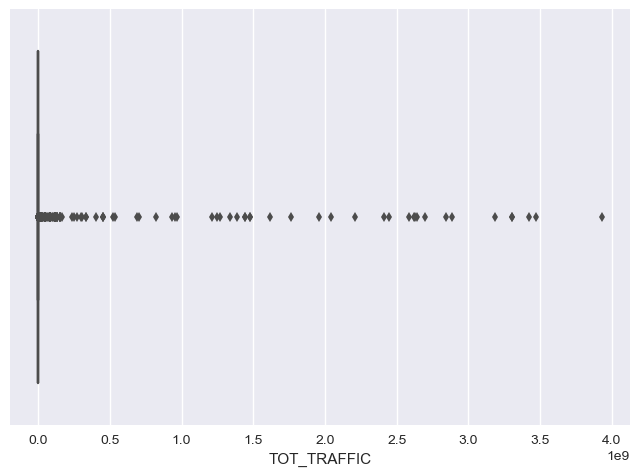

In [46]:
plt.figure(dpi=100)
sns.boxplot(df_traffic_nan.TOT_TRAFFIC)
#boxplot after removing NaNs

In [47]:
df_traffic_nan.TOT_TRAFFIC.describe()
#check

count    1.686591e+06
mean     5.248713e+04
std      1.023118e+07
min      0.000000e+00
25%      3.600000e+01
50%      1.960000e+02
75%      5.040000e+02
max      3.929731e+09
Name: TOT_TRAFFIC, dtype: float64

(0, 2000)

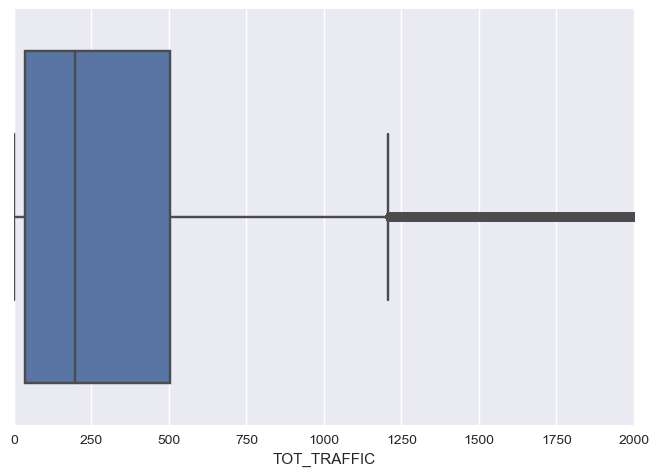

In [48]:
plt.figure(dpi=100)
histplot=sns.boxplot(df_traffic_nan.TOT_TRAFFIC)
histplot.set_xlim(0,2000)
#zooming in on box plot to see where outliers begin

In [49]:
df_active_hrs.TOT_TRAFFIC.describe()
#check to see if our outlier cutoff point is correct
#using best practices in stats, 75%-25% = 641-94 = 547; 547*1.5 = 820.5; 820.5 + 641 = 1461.50; 
#we chose 1450 and this seems close enough to us to not worry about our choice

count    1.153112e+06
mean     3.864354e+04
std      9.191074e+06
min      0.000000e+00
25%      9.400000e+01
50%      3.140000e+02
75%      6.410000e+02
max      3.929731e+09
Name: TOT_TRAFFIC, dtype: float64

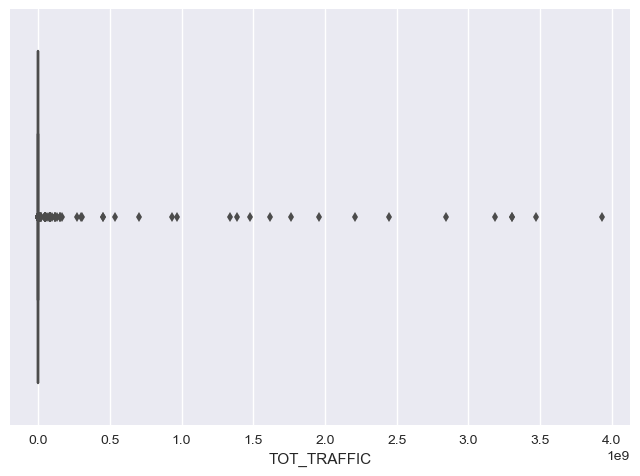

In [50]:
plt.figure(dpi=100)
sns.boxplot(df_active_hrs.TOT_TRAFFIC)
#boxplot after removing midnight to 6am time period

(0, 1800)

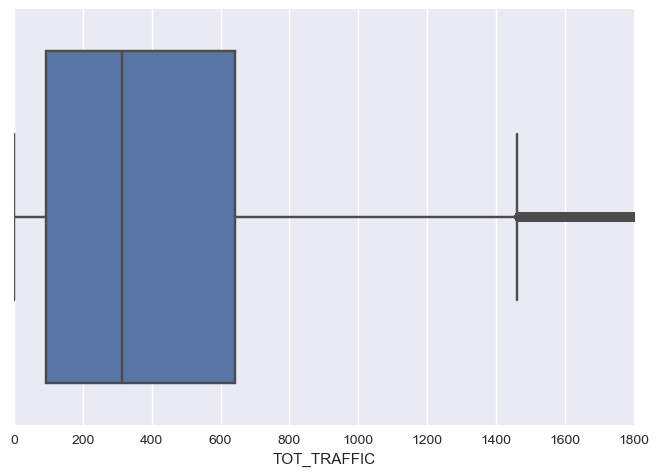

In [51]:
plt.figure(dpi=100)
histplot=sns.boxplot(df_active_hrs.TOT_TRAFFIC)
histplot.set_xlim(0,1800)
#zooming in to view outliers

In [52]:
outlier_limit = 1450 #limit set by us for outliers

In [53]:
df_excl_outliers = df_active_hrs[(df_active_hrs.TOT_TRAFFIC < outlier_limit)] #set dataset to exclue traffic larger than 1450

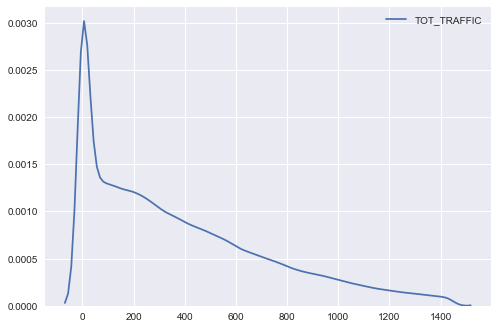

In [54]:
sns.kdeplot(df_excl_outliers.TOT_TRAFFIC) #plot to view outliers

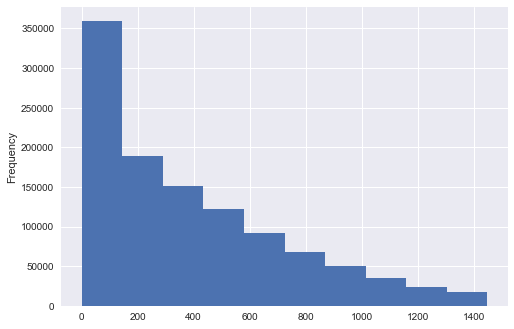

In [55]:
df_excl_outliers.TOT_TRAFFIC.plot.hist() #hist to view outliers

(0, 1500)

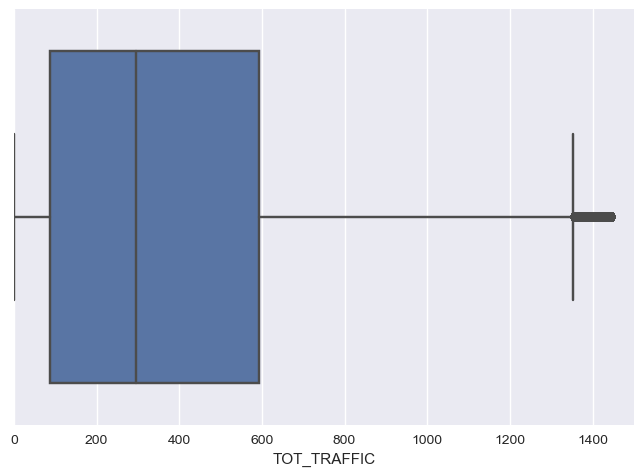

In [56]:
plt.figure(dpi=100)
histplot=sns.boxplot(df_excl_outliers.TOT_TRAFFIC)
histplot.set_xlim(0,1500)
#box plot after incorporating cut off

In [57]:
1-(df_active_hrs.UNIT.count() - df_excl_outliers.UNIT.count())/df_active_hrs.UNIT.count()
#take percentage of data kept

0.9624858643392836

In [58]:
df_excl_outliers.TOT_TRAFFIC.describe()
#check

count    1.109854e+06
mean     3.824873e+02
std      3.497731e+02
min      0.000000e+00
25%      8.700000e+01
50%      2.950000e+02
75%      5.930000e+02
max      1.449000e+03
Name: TOT_TRAFFIC, dtype: float64

In [59]:
print(df_traffic.TOT_TRAFFIC.median(),df_active_hrs.TOT_TRAFFIC.median(),df_excl_outliers.TOT_TRAFFIC.median())
#compare median

191.0 314.0 295.0


In [60]:
print(df_traffic_nan.TOT_TRAFFIC.mean(),df_active_hrs.TOT_TRAFFIC.mean(),df_excl_outliers.TOT_TRAFFIC.mean())
#compare means

52487.132724531315 38643.54428104122 382.4873091415628


In [61]:
df_excl_outliers.shape
#check dimension

(1109854, 19)

In [62]:
df_excl_outliers['STATION'].head()
#check

REMOTE_ID
A002R051    59 ST
A002R051    59 ST
A002R051    59 ST
A002R051    59 ST
A002R051    59 ST
Name: STATION, dtype: object

In [63]:
df_excl_outliers.reset_index()
#check

REMOTE_ID    C/A  UNIT       SCP        STATION LINENAME DIVISION  \
0         A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
1         A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
2         A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
3         A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
4         A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
5         A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
6         A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
7         A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
8         A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
9         A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
10        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
11        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
12        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
13        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
14        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
15        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
16        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
17        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
18        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
19        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
20        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
21        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
22        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
23        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
24        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
25        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
26        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
27        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
28        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
29        A002R051   A002  R051  02-00-00          59 ST   NQR456      BMT   
...            ...    ...   ...       ...            ...      ...      ...   
1109824  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109825  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109826  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109827  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109828  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109829  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109830  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109831  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109832  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109833  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109834  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109835  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109836  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109837  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109838  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109839  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109840  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109841  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109842  TRAM2R469  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
1109843  TRAM2R469  TRAM2  R469

In [64]:
#df_traffic.groupby(['STATION'])['TOT_TRAFFIC'].sum().nlargest(10)
#df_excl_outliers.groupby(['STATION'])['TOT_TRAFFIC'].sum().nlargest(10)

In [65]:
df_topten_stations = df_excl_outliers.groupby(['STATION']).TOT_TRAFFIC.agg(['sum']).sort_values(by=['sum'], ascending=False).head(18)
df_topten_stations
#sort to find top 10 stations by sum

sum
STATION                    
34 ST-PENN STA   12033103.0
86 ST             6643242.0
23 ST             6474320.0
34 ST-HERALD SQ   6316468.0
125 ST            5924699.0
CANAL ST          5921749.0
59 ST             5629349.0
CHAMBERS ST       5205049.0
FULTON ST         4892931.0
14 ST-UNION SQ    4729089.0
WALL ST           4323948.0
14 ST             4214443.0
28 ST             4113494.0
50 ST             3817255.0
42 ST-PORT AUTH   3793984.0
72 ST             3754679.0
TIMES SQ-42 ST    3465085.0
GRD CNTRL-42 ST   3310540.0

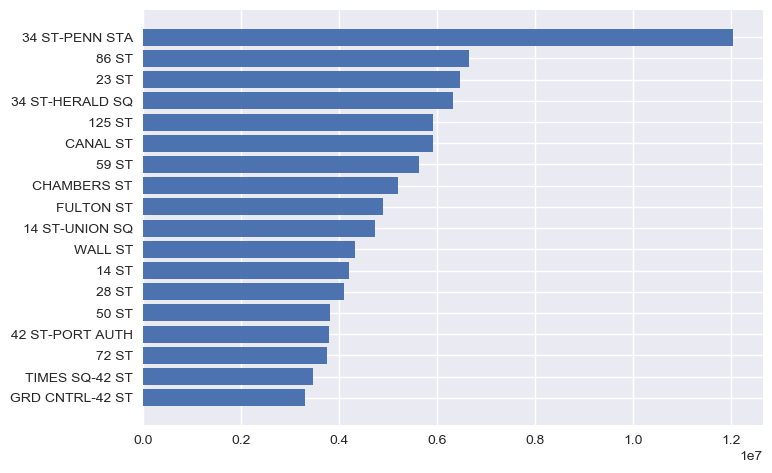

In [66]:
categories = df_topten_stations.index
values = df_topten_stations['sum']

plt.figure(dpi=100)

plt.barh(np.arange(len(categories)), values[::-1])

plt.yticks(np.arange(len(categories)),
           ['{}'.format(x) for x in categories[::-1]]);
#plot top 10 stations